# Downloading and Analyzing the Dataset with Visualizations

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from importlib.metadata import version
import logging, os
from pathlib import Path

In [2]:
# Set up logging
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [3]:
packages = ["pandas", "seaborn", "matplotlib", "importlib-metadata"]
for package in packages:
    try:
        logger.info(f"{package} version: {version(package)}")
    except Exception as e:
        logger.warning(f"Could not get version for package {package}: {e}")

INFO:__main__:pandas version: 2.3.2
INFO:__main__:seaborn version: 0.13.2
INFO:__main__:matplotlib version: 3.10.6
INFO:__main__:importlib-metadata version: 8.7.0


## Download the data from huggingface to a dataframe
 - Download data
 - Save the data to local directory to store the raw data file

In [4]:
DATA_ROOT = Path("../Data")
RAW_DATA_DIR_NAME = "Downloaded-Data"

DATA_RAW_FILE_NAME = "data-RAW.csv"
DATA_CLEAN_FILE_NAME = "data-CLEAN.csv"

RAW_DATA_PATH = DATA_ROOT / RAW_DATA_DIR_NAME / DATA_RAW_FILE_NAME
# DATA_PATH = DATA_ROOT / RAW_DATA_DIR_NAME / DATA_CLEAN_FILE_NAME

### Download the dataset from the Huggingface Dataset Directory

In [5]:
DATASET_URL = "hf://datasets/guyshilo12/diabetes_eda_analysis/diabetes_dataset.csv"

df = pd.read_csv(DATASET_URL)  # May take a while due to the size of the dataset

c:\Users\brianperez\AppData\Local\anaconda3\envs\type2_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Or use the locally downloaded one

In [ ]:
# df = pd.read_csv(RAW_DATA_PATH)  # Use if already downloaded

In [6]:
os.makedirs(DATA_ROOT / RAW_DATA_DIR_NAME, exist_ok=True)  # Create directory if it doesn't exist

In [7]:
df.to_csv(
    RAW_DATA_PATH, index=False
)  # Save the data to local directory to store the raw data file, without saving the indexes

## Data Exploration

In [6]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes,age_group,abdominal_obesity,bmi_group,bmi_whr_group,activity_level,alcohol_group
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,8.18,29.6,Type 2,1,50–59,0,Obese,Obese | AbdominalObesity=0,High,NaN
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,5.63,23.0,No Diabetes,0,40–49,0,Normal,Normal | AbdominalObesity=0,Moderate,Light
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,7.51,44.7,Type 2,1,50–59,0,Normal,Normal | AbdominalObesity=0,Low,Light
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,9.03,38.2,Type 2,1,70–79,1,Overweight,Overweight | AbdominalObesity=1,Low,NaN
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,7.20,23.5,Type 2,1,40–49,0,Normal,Normal | AbdominalObesity=0,Moderate,Light


df.tail()

In [7]:
df.size  # Amount of data points

3700000

In [8]:
df.shape

(100000, 37)

df.columns

In [9]:
df.isnull().sum()

age                                       0
gender                                    0
ethnicity                                 0
education_level                           0
income_level                              0
employment_status                         0
smoking_status                            0
alcohol_consumption_per_week              0
physical_activity_minutes_per_week        0
diet_score                                0
sleep_hours_per_day                       0
screen_time_hours_per_day                 0
family_history_diabetes                   0
hypertension_history                      0
cardiovascular_history                    0
bmi                                       0
waist_to_hip_ratio                        0
systolic_bp                               0
diastolic_bp                              0
heart_rate                                0
cholesterol_total                         0
hdl_cholesterol                           0
ldl_cholesterol                 

In [12]:
df.dtypes

age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status                         object
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
family_history_diabetes                 int64
hypertension_history                    int64
cardiovascular_history                  int64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                   

## Interpreting the Columns:

Example:
 - feature 1: Description of feature 1.  (AMOUNT OF NULL VALUES)
 - feature 2: Description of feature 2. (AMOUNT OF NULL VALUES)

Actual:
 - age                                       (0)
 - gender                                    (0)
 - ethnicity                                 (0)
 - education_level                           (0)
 - income_level                              (0)
 - employment_status                         (0)
 - smoking_status                            (0)

    > Smoking increases insulin resistance and inflammation, raising type 2 diabetes risk by 30–40%.

 - alcohol_consumption_per_week              (0)

    > Moderate intake may slightly improve insulin sensitivity, decreasing risk of diabetes, but heavy drinking increases diabetes risk via liver damage and weight gain.
    Not diagnostic, but relevant for risk assessment and management.

 - physical_activity_minutes_per_week        (0)
 - diet_score                                (0)
 - sleep_hours_per_day                       (0)
 - screen_time_hours_per_day                 (0)
 - family_history_diabetes                   (0)
 - hypertension_history:                      (0)

    > Hypertension often coexists with diabetes and metabolic syndrome - a cluster of conditions that together raise the risk of Type 2 diabetes. 

 - cardiovascular_history:                   (0)
 - bmi                                       (0)

    > Body Mass Index calculated by dividing Weight (kg) by Height (m)

    > Categories:
    > - Underweight: <18.5
    > - Normal: 18.5–24.9
    > - Overweight: 25–29.9
    > - Obese: ≥30

 - waist_to_hip_ratio:                        (0)

    > High Waist to Hip Ratio indicates central obesity, a strong predictor of insulin resistance and type 2 diabetes.
    > Not diagnostic, but better than BMI for predicting diabetes risk

    > Men: Low risk: ≤0.90, High risk: >0.90

    > Women: Low risk: ≤0.85, High risk: >0.85

 - systolic_bp:                               (0)

    > Pressure in arteries when the heart contracts (pumps blood)

    > Elevated BP is common in diabetes but does not diagnose it.
    > Useful for risk stratification, not for diagnosis.

    > Note: Systolic BP Increases with Age due to Arterial Stiffness, Plaque Build-Up, and Hormonal Changes.

 - diastolic_bp:

    > Pressure when the heart relaxes between beats.

    > Elevated BP is common in diabetes but does not diagnose it. 
    > Useful for risk stratification, not for diagnosis.

 - heart_rate     

    > Diabetes can cause autonomic neuropathy, leading to abnormal heart rate or variability.
    > Not diagnostic, but may indicate complications.

 - cholesterol_total

    > Sum of all cholesterol types in blood. Indicator of diabetic dyslipidemia, referring to a specific pattern of abnormal blood lipid levels commonly seen in people with diabetes.

    > Total Cholesterol = HDL+LDL+VLDL = HDL+LDL+(Triglycerides/5)
    > Ideal Level: Total Cholesterol: <200 mg/dL

 - hdl_cholesterol:

    > High-Density Lipoprotein Cholesterol: “Good” cholesterol. Removes excess cholesterol from arteries. Higher HDL = better.

    > Ideal Level: >40 mg/dL (men), >50 mg/dL (women)

 - ldl_cholesterol:

    > Low-Density Lipoprotein Cholesterol: “Bad” cholesterol.

    > Deposits cholesterol in artery walls, leading to plaque buildup. Lower LDL = better.

    > Ideal Level: <100 mg/dL

 - triglycerides:  

    > A type of fat in blood. High levels often linked to insulin resistance and diabetes.

    > Ideal Level: <150 mg/dL

 - glucose_fasting

    > Glucose levels when fasting

 - glucose_postprandial:                     (0)

    > Measure of blood glucose levels ~ 2 hours after a meal.

    > Elevated post-meal glucose is an early sign of impaired glucose metabolism and type 2 diabetes.

    > Ranges: <18 µU/mL too Low; Typical peak: 18–276 mg/dL = Healty insulin response; ≥276 mg/dL = insulin resistance or hyperinsulinemia

 - insulin_level:  

    > Units: µU/mL (micro-units per milliliter) or mIU/L (milli-international units per liter). Units are interchangeable: 1 µU/mL = 1 mIU/L

    > Fasting Insulin (after 8–12 hours without food):

    > - Normal: 2–25 µU/mL
    > - Optimal: Many experts suggest <10 µU/mL for best metabolic health
    > - Above 25 µU/mL: May indicate insulin resistance or hyperinsulinemia
    > - Below 2 µU/mL: May indicate type 1 diabetes or pancreatic dysfunction

    > Postprandial (after eating, usually 30–90 minutes):

    > - Normal peak: 18–276 µU/mL
    > - Should return to baseline within 2–3 hours
    > - Higher spikes often occur after high-carb meals

 - hba1c:          

    > Hemoglobin A1c

    > Average blood sugar over 2–3 months.

    > Diagnostic use: HbA1c 5.7–6.4% = prediabetes. HbA1c ≥6.5% = diabetes

    > Strength: Does not require fasting and is widely used for diagnosis and monitoring.

 - diabetes_risk_score                       (0)
 - diabetes_stage 
 - diagnosed_diabetes                        (0)

   > Label/Target Column

 - age_group                              (2458)

   > Tedious to convert NaNs to appropriate groups; Dropping this column
 - abdominal_obesity                         (0)
 - bmi_group      
 - bmi_whr_group  

   > Dropping this redundant entry
 - activity_level 
 - alcohol_group                         (13535)

   > Replacing nans with "Light"
   > df["alcohol_group"] = df["alcohol_group"].fillna("Light")


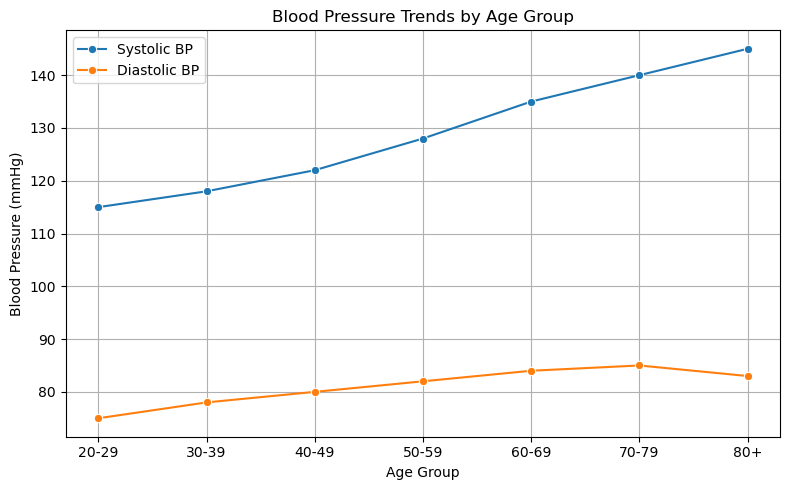

In [13]:
# Simulated average blood pressure trends by age group
data = {
    'Age Group': ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'],
    'Systolic_BP': [115, 118, 122, 128, 135, 140, 145],
    'Diastolic_BP': [75, 78, 80, 82, 84, 85, 83]
}

# Create DataFrame
df = pd.DataFrame(data)

# Seaborn plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Age Group', y='Systolic_BP', marker='o', label='Systolic BP')
sns.lineplot(data=df, x='Age Group', y='Diastolic_BP', marker='o', label='Diastolic BP')
plt.title('Blood Pressure Trends by Age Group')
plt.ylabel('Blood Pressure (mmHg)')
plt.xlabel('Age Group')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Analyzing different unique values

In [31]:
ethnicity_df_unique = sorted(df["ethnicity"].unique().tolist())
education_level_df_unique = sorted(df["education_level"].unique().tolist())
income_level_df_unique = sorted(df["income_level"].unique().tolist())
employment_status_df_unique = sorted(df["employment_status"].unique().tolist())

In [32]:
print(ethnicity_df_unique)
print(education_level_df_unique)
print(income_level_df_unique)
print(employment_status_df_unique)

['Asian', 'Black', 'Hispanic', 'Other', 'White']
['Graduate', 'Highschool', 'No formal', 'Postgraduate']
['High', 'Low', 'Lower-Middle', 'Middle', 'Upper-Middle']
['Employed', 'Retired', 'Student', 'Unemployed']


In [33]:
smoking_status_df_unique = sorted(df["smoking_status"].unique().tolist())
alcohol_consumption_per_week_df_unique = sorted(df["alcohol_consumption_per_week"].unique().tolist())
diet_score_df_unique = sorted(df["diet_score"].unique().tolist())
family_history_diabetes_df_unique = sorted(df["family_history_diabetes"].unique().tolist())

In [34]:
print(smoking_status_df_unique)
print(alcohol_consumption_per_week_df_unique)
print(diet_score_df_unique)
print(family_history_diabetes_df_unique)

['Current', 'Former', 'Never']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0]
[0, 1]


In [35]:
hypertension_history_df_unique = sorted(df["hypertension_history"].unique().tolist())
cardiovascular_history_df_unique = sorted(df["cardiovascular_history"].unique().tolist())
bmi_df_unique = sorted(df["bmi"].unique().tolist())
waist_to_hip_ratio_df_unique = sorted(df["waist_to_hip_ratio"].unique().tolist())

In [36]:
print(hypertension_history_df_unique)
print(cardiovascular_history_df_unique)
print(bmi_df_unique)
print(waist_to_hip_ratio_df_unique)

[0, 1]
[0, 1]
[15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 3

In [37]:
systolic_bp_df_unique = sorted(df["systolic_bp"].unique().tolist())
diastolic_bp_df_unique = sorted(df["diastolic_bp"].unique().tolist())
heart_rate_df_unique = sorted(df["heart_rate"].unique().tolist())
cholesterol_total_df_unique = sorted(df["cholesterol_total"].unique().tolist())

In [38]:
print(systolic_bp_df_unique)
print(diastolic_bp_df_unique)
print(heart_rate_df_unique)
print(cholesterol_total_df_unique)

[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 179]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110]
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 105]
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 1

In [40]:
hdl_cholesterol_df_unique = sorted(df["hdl_cholesterol"].unique().tolist())
ldl_cholesterol_df_unique = sorted(df["ldl_cholesterol"].unique().tolist())
triglycerides_df_unique = sorted(df["triglycerides"].unique().tolist())
glucose_fasting_df_unique = sorted(df["glucose_fasting"].unique().tolist())

In [41]:
print(hdl_cholesterol_df_unique)
print(ldl_cholesterol_df_unique)
print(triglycerides_df_unique)
print(glucose_fasting_df_unique)

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 19

In [42]:
glucose_postprandial_df_unique = sorted(df["glucose_postprandial"].unique().tolist())
insulin_level_df_unique = sorted(df["insulin_level"].unique().tolist())
hba1c_df_unique = sorted(df["hba1c"].unique().tolist())
abdominal_obesity_df_unique = sorted(df["abdominal_obesity"].unique().tolist())

In [43]:
print(glucose_postprandial_df_unique)
print(insulin_level_df_unique)
print(hba1c_df_unique)
print(abdominal_obesity_df_unique)

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,

In [39]:
# bmi_whr_group_df_unique = sorted(df["bmi_whr_group"].unique().tolist())
df["alcohol_group"] = df["alcohol_group"].fillna("Light")
alcohol_group_df_unique = str(df["alcohol_group"].unique().tolist())

In [40]:
# print(bmi_whr_group_df_unique)
print(alcohol_group_df_unique)

['Light', 'Moderate', 'Heavy']


## Visualizing Data

### Countplots

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


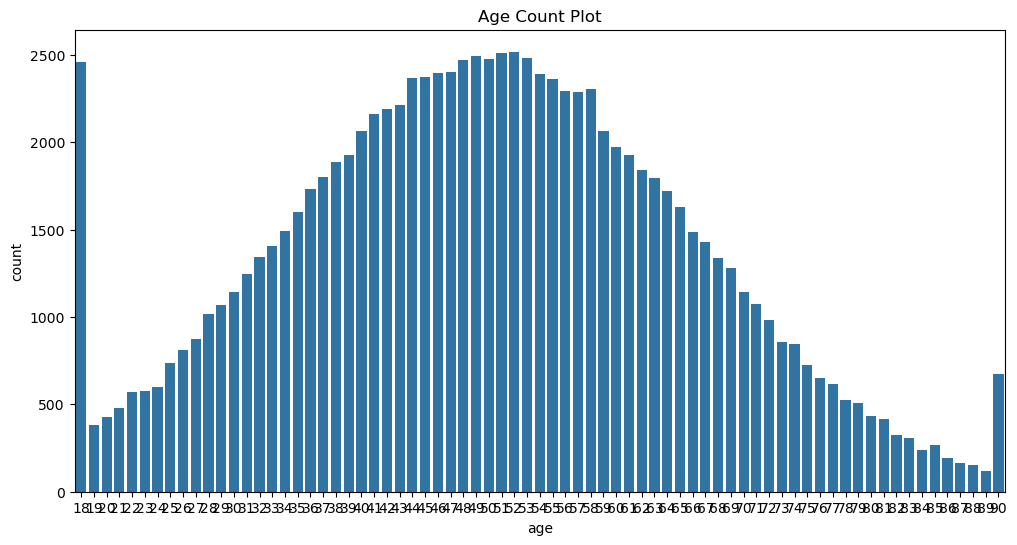

In [22]:
plt.figure(figsize=(12, 6))
# sns.countplot(x='age', data=df)  # Alternative way
sns.countplot(x=df["age"])  # More direct
plt.title("Age Count Plot")
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


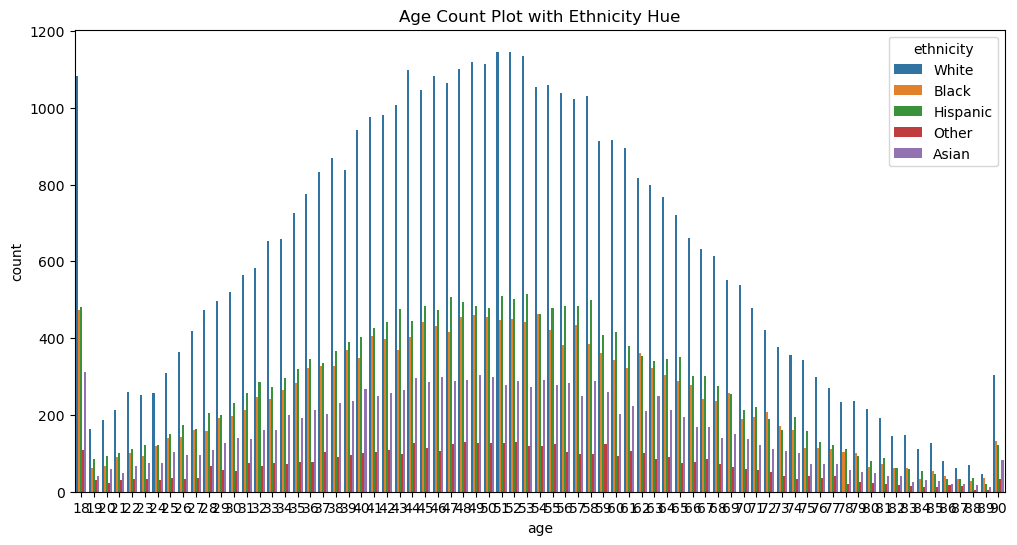

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["age"], hue=df["ethnicity"])
plt.title("Age Count Plot with Ethnicity Hue")
plt.show()

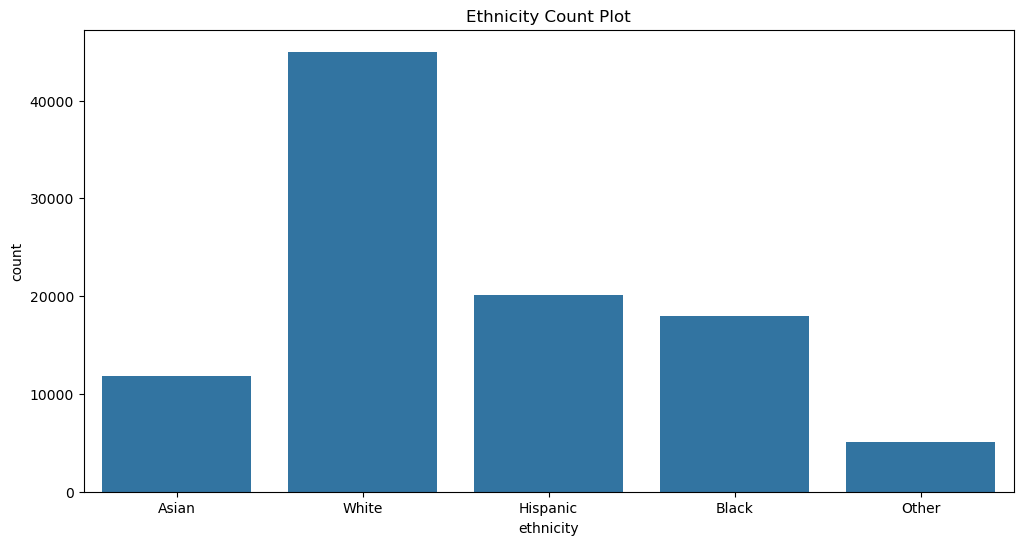

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["ethnicity"])
plt.title("Ethnicity Count Plot")
plt.show()

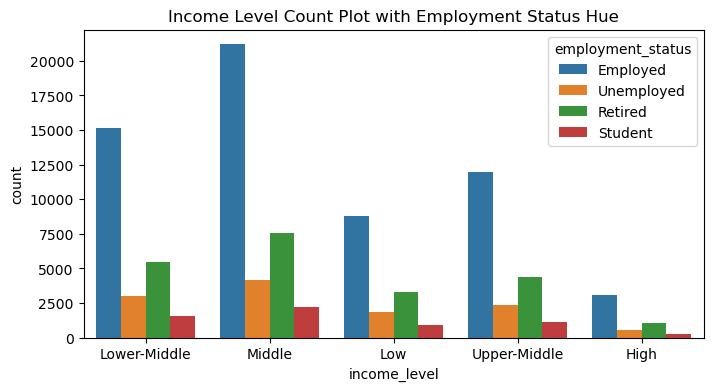

In [45]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="income_level", hue="employment_status")
plt.title("Income Level Count Plot with Employment Status Hue")
plt.show()

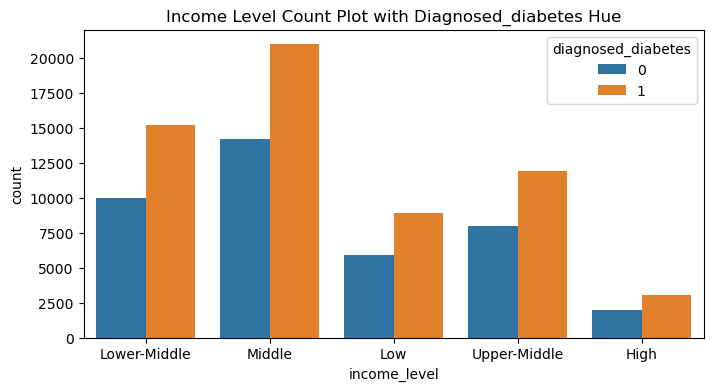

In [44]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="income_level", hue="diagnosed_diabetes")
plt.title("Income Level Count Plot with Diagnosed_diabetes Hue")
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


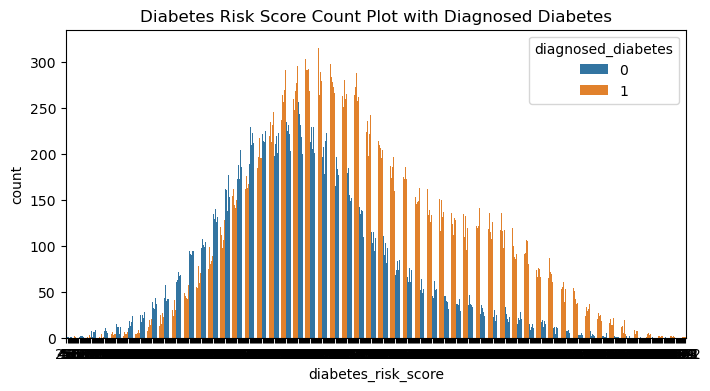

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="diabetes_risk_score", hue="diagnosed_diabetes")
plt.title("Diabetes Risk Score Count Plot with Diagnosed Diabetes")
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


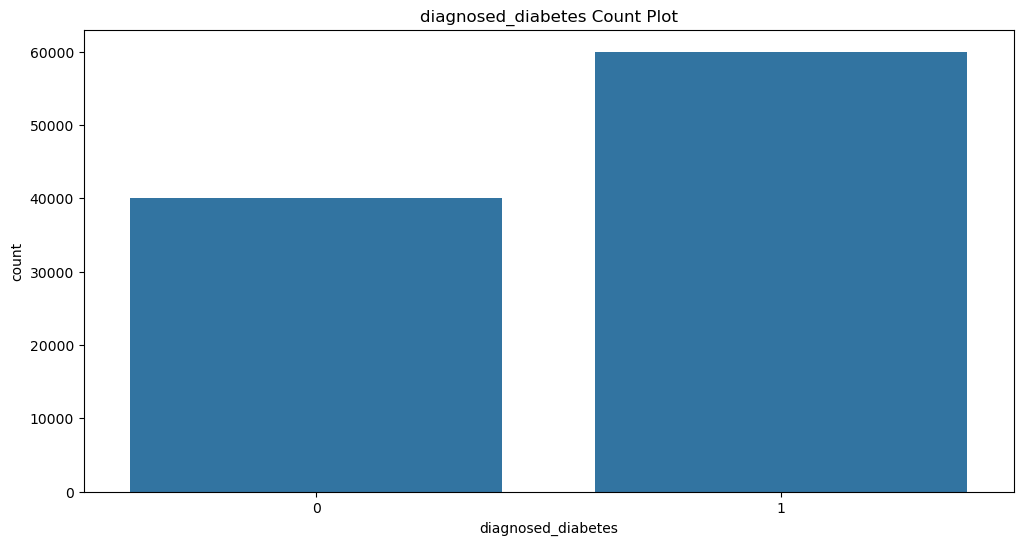

In [47]:
plt.figure(figsize=(12, 6))
# sns.countplot(x='age', data=df)  # Alternative way
sns.countplot(x=df["diagnosed_diabetes"])  # More direct
plt.title("diagnosed_diabetes Count Plot")
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


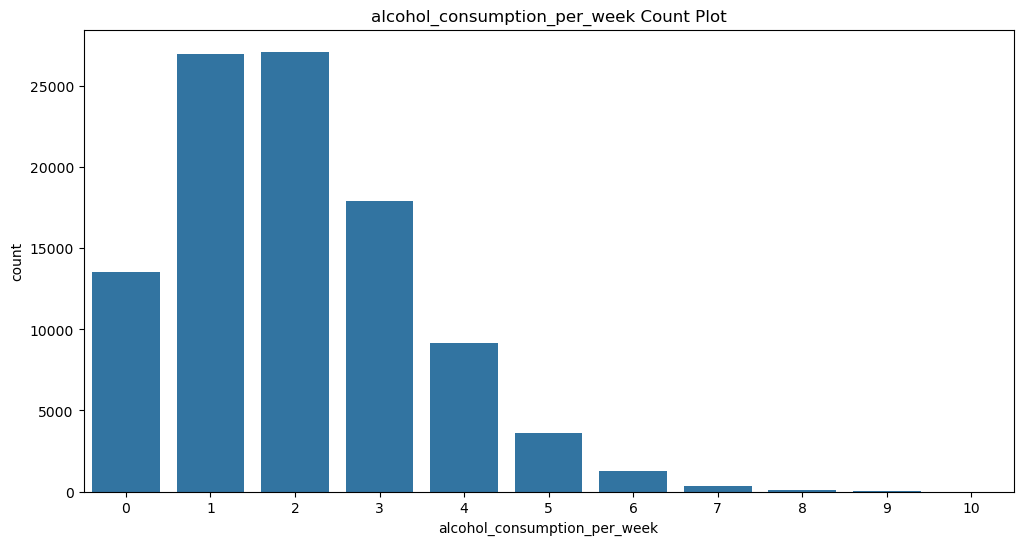

In [48]:
plt.figure(figsize=(12, 6))
# sns.countplot(x='age', data=df)  # Alternative way
sns.countplot(x=df["alcohol_consumption_per_week"])  # More direct
plt.title("alcohol_consumption_per_week Count Plot")
plt.show()

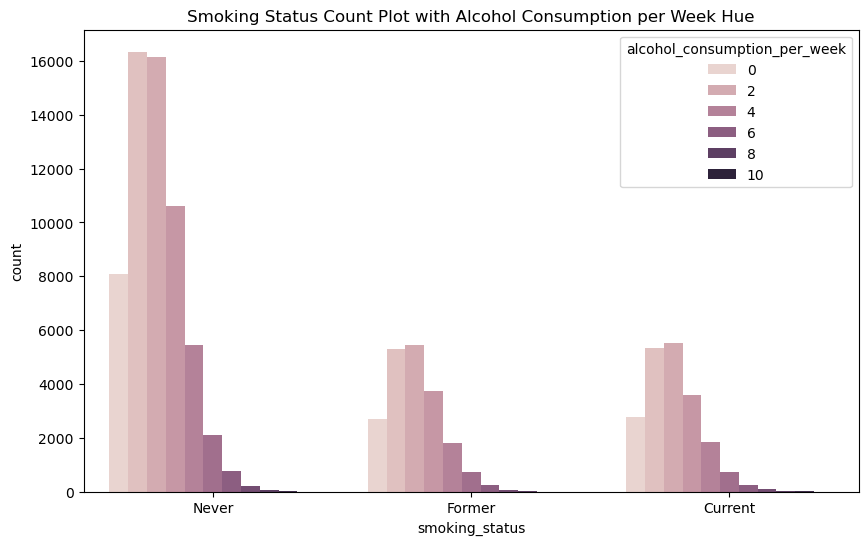

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="smoking_status", hue="alcohol_consumption_per_week")
plt.title(label="Smoking Status Count Plot with Alcohol Consumption per Week Hue")
plt.show()

### ScatterPlots

<Axes: xlabel='diabetes_risk_score', ylabel='diabetes_stage'>

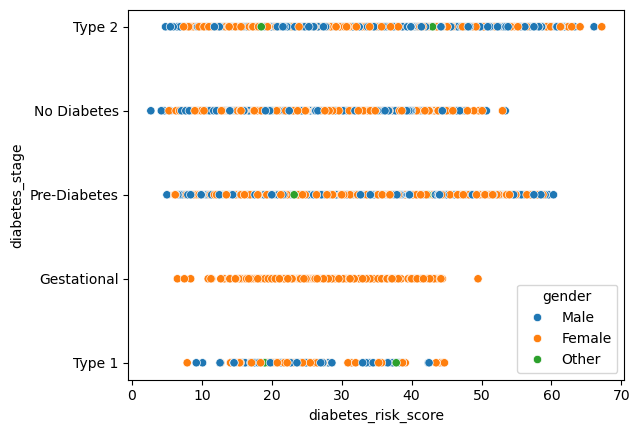

In [46]:
sns.scatterplot(data=df, x="diabetes_risk_score", y="diabetes_stage", hue="gender")

<Axes: xlabel='bmi', ylabel='ethnicity'>

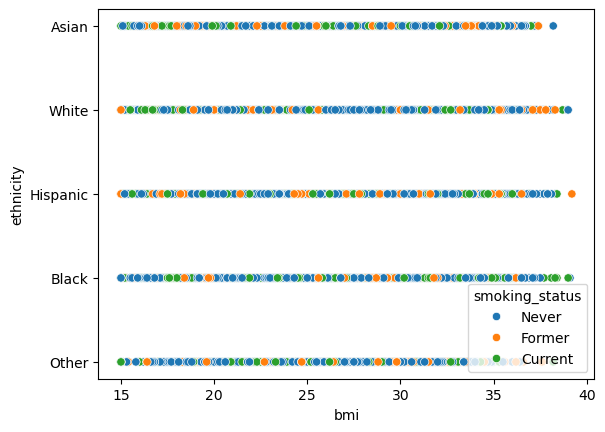

In [51]:
sns.scatterplot(data=df, x="bmi", y="ethnicity", hue="smoking_status")

<Axes: xlabel='diabetes_stage', ylabel='diabetes_risk_score'>

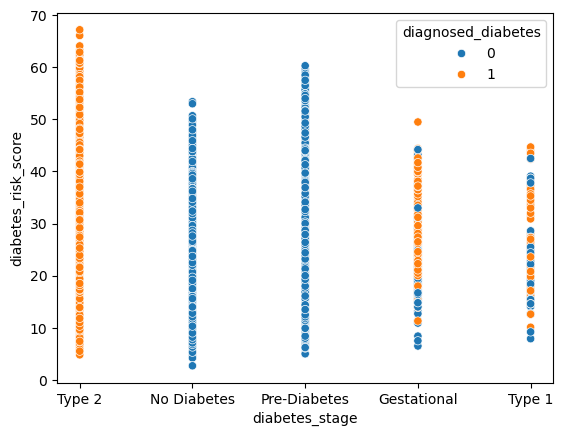

In [17]:
sns.scatterplot(data=df, x="diabetes_stage", y="diabetes_risk_score", hue="diagnosed_diabetes")

<Axes: xlabel='abdominal_obesity', ylabel='diabetes_stage'>

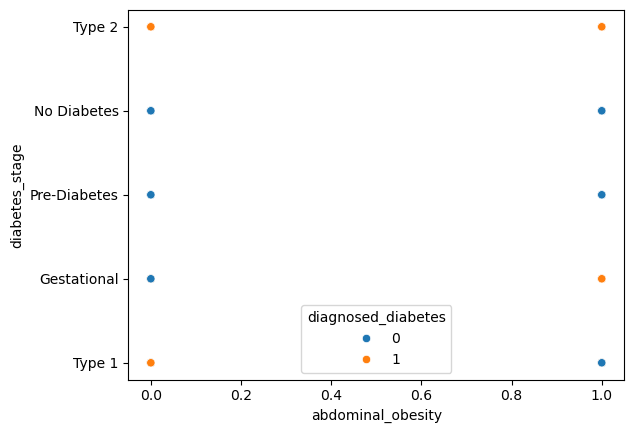

In [18]:
sns.scatterplot(data=df, x="abdominal_obesity", y="diabetes_stage", hue="diagnosed_diabetes")

<Axes: xlabel='insulin_level', ylabel='screen_time_hours_per_day'>

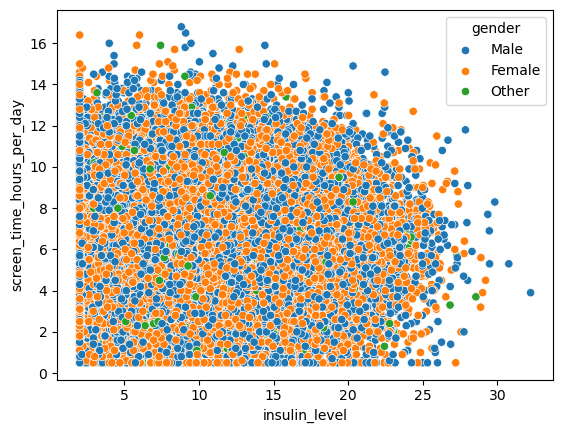

In [59]:
sns.scatterplot(data=df, x="insulin_level", y="screen_time_hours_per_day", hue="gender")

In [ ]:
sns.scatterplot(data=df, x="age", y="children", hue="smoker")

### Distribution Plots

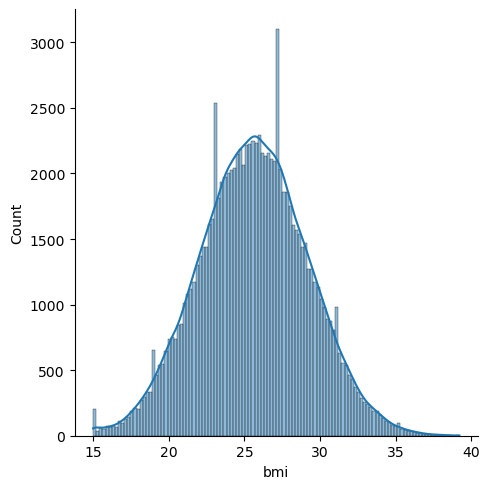

In [60]:
sns.displot(df["bmi"], kde=True)

<Axes: xlabel='ethnicity', ylabel='count'>

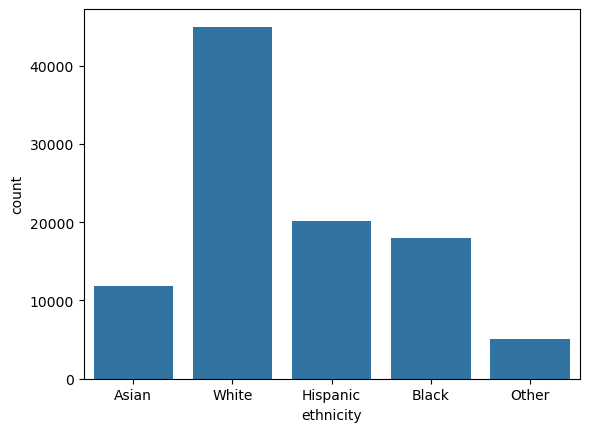

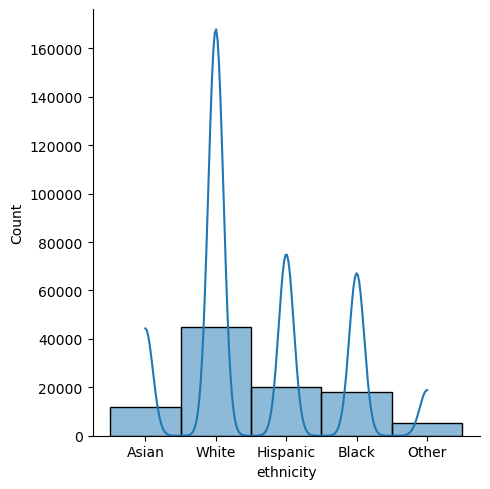

In [41]:
sns.displot(df["ethnicity"], kde=True)

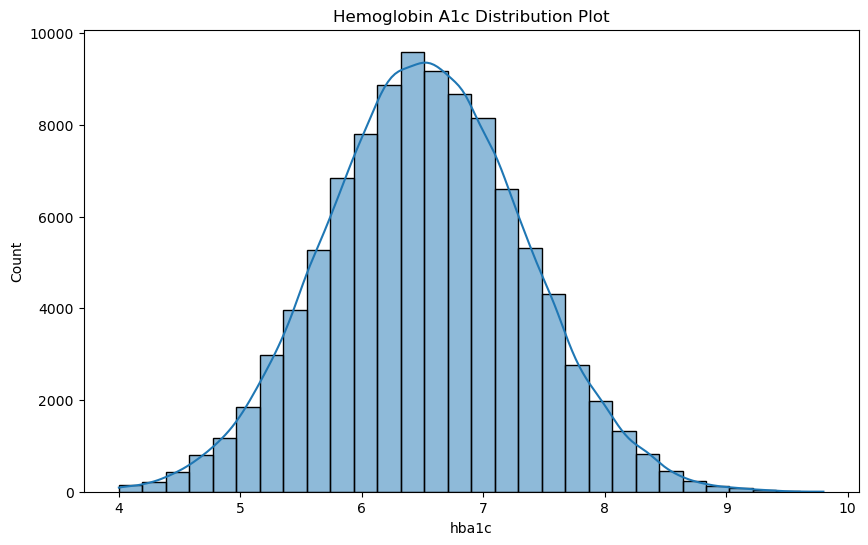

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="hba1c", bins=30, kde=True)
plt.title("Hemoglobin A1c Distribution Plot")
plt.show()

### Jointplots

In [ ]:
sns.jointplot(data=df, x="age", y="charges", hue="smoker")

Describe

In [ ]:
df.describe()

### End